Implementing a basic DE solver for the neutrino winds in terms of psi

Runge-Kutta method from Wikipedia:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/25f03454fd25957cc63be11ec534efdce349c52f">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/95bdbb2e3aa83735085c0aadd577162c69e4056a">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/81398071e8f180ac143bfdf4598ff47bf79eb689">
I use $\psi$ in place of t, and {r,v} as y. I calculate separate k values for r and v to get y'={r',v'}

Questions/next steps:

Isentropic wind with ideal gas equation of state<br />
check small v0 - no turnover I can find<br />
check limits of gamma, maybe find v0 as a function of gamma<br />
calculate realistic a value<br />
incorporate general EoS, not just gamma law

In [3]:
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


v vs r:
T vs r:
T vs v:


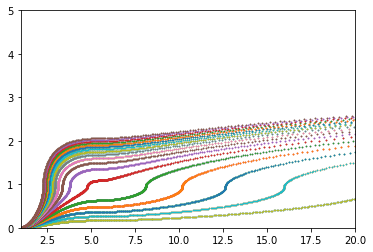

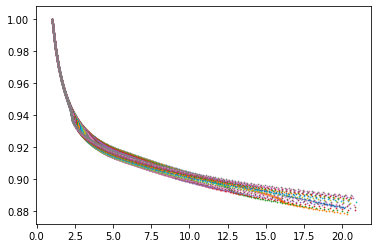

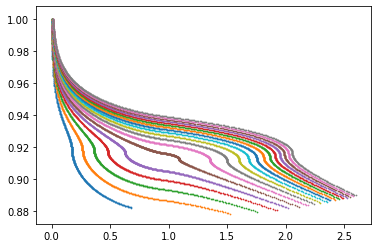

In [94]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import Adiabatic_wind_solver as aws
s=aws.solver(1.01,10)
s.makePlots(.001,.01,.0005,True,20,5);

v vs r:
T vs r:
T vs v:


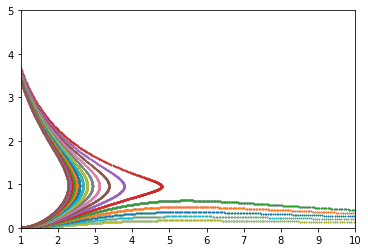

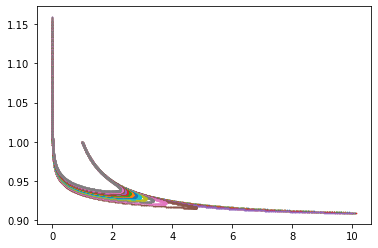

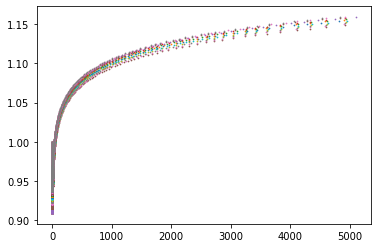

In [95]:
s.makePlots(.001,.01,.0005,False,10,5);

Lower bound on v0:  0.003436973285675047
Upper bound on v0:  0.003436983108520503
Estimated v0:  0.003436978197097775
Estimated error:  4.911422728150899e-09


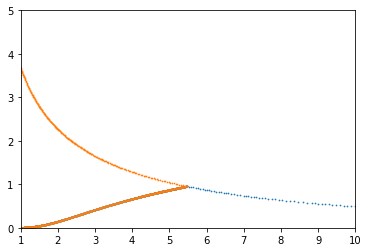

In [96]:
v0avg=s.findV0(.001,.006,.0001)

Max iteration count exceeded in adaptation


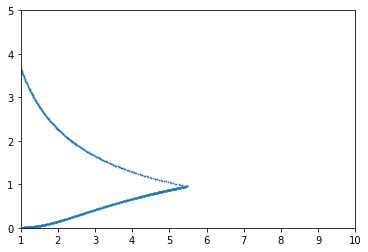

In [47]:
s.makePlot(v0avg,AV=False,xrange=10);

In [109]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import Adiabatic_wind_solver as aws
def gammaSearch(a=10):
    gdata=np.array([])
    error=False
    g=1
    i=0
    lower=.001
    upper=.006
    delta=.0001
    while not error and g<=5/3:
        print("Searching gamma=",g)
        s=aws.solver(g,10)
        #gdata=np.array([])
        if i==0:
            gdata=[g,s.findV0(.001,.006,.0001)]
        else:
            try:
                print(gdata)
                gdata=np.vstack((gdata,[g,s.findV0(lower,upper,delta)]))
            except ValueError:
                lower=lower/10
                upper=upper/2
                delta=delta/10
            except:
                error=True
                print("Error")
        g=g+.0025
        i=i+1
    print(gdata)
    return gdata

Lower bound on v0:  0.004629105961322784
Upper bound on v0:  0.004629117393493649
Estimated v0:  0.004629111677408216
Estimated error:  5.716085432674184e-09


0.004629111677408216

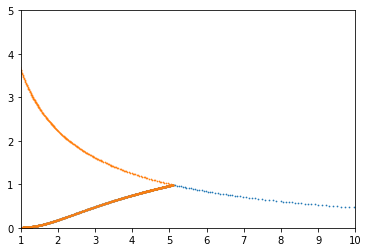

In [84]:
s1=aws.solver(1.0025,10)
s1.findV0(.001,.006,.0001)

Searching gamma= 1
Lower bound on v0:  0.0050753133773803714
Upper bound on v0:  0.005075325393676755
Estimated v0:  0.005075319385528563
Estimated error:  6.008148191634366e-09
Searching gamma= 1.0025
[1, 0.005075319385528563]
Lower bound on v0:  0.004629105961322784
Upper bound on v0:  0.004629117393493649
Estimated v0:  0.004629111677408216
Estimated error:  5.716085432674184e-09
Searching gamma= 1.005
[[1.         0.00507532]
 [1.0025     0.00462911]]
Lower bound on v0:  0.004207312214374542
Upper bound on v0:  0.004207323646545406
Estimated v0:  0.004207317930459974
Estimated error:  5.716085432240503e-09
Searching gamma= 1.0074999999999998
[[1.         0.00507532]
 [1.0025     0.00462911]
 [1.005      0.00420732]]
Lower bound on v0:  0.003810056543350217
Upper bound on v0:  0.0038100668907165482
Estimated v0:  0.0038100617170333823
Estimated error:  5.1736831656930965e-09
Searching gamma= 1.0099999999999998
[[1.         0.00507532]
 [1.0025     0.00462911]
 [1.005      0.00420732

Searching gamma= 1.047499999999999
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]]
Lower bound on v0:  0.0003563307952880863
Upper bound on v0:  0.0003563325494527749
Estimated v0:  0.0003563316723704306
Estimated error:  8.770823443069765e-10
Searching gamma= 1.049999999999999
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250

Lower bound on v0:  2.113185119628907e-05
Upper bound on v0:  2.1131958007839326e-05
Estimated v0:  2.11319046020642e-05
Estimated error:  5.340577512797024e-11
Searching gamma= 1.0724999999999985
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.0650000

Searching gamma= 1.092499999999998
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.1099999999999977
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.1249999999999973
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.137499999999997
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.1499999999999968
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.1624999999999965
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.1724999999999963
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.182499999999996
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.192499999999996
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.2024999999999957
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.2124999999999955
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.2199999999999953
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.2274999999999952
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.234999999999995
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.2424999999999948
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.2499999999999947
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.2574999999999945
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.2649999999999944
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.2724999999999942
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.279999999999994
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.2874999999999939
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.2949999999999937
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3024999999999936
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3099999999999934
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3174999999999932
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3224999999999931
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.327499999999993
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.332499999999993
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.3374999999999928
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3424999999999927
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3474999999999926
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3524999999999925
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3574999999999924
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3624999999999923
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3674999999999922
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.372499999999992
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.377499999999992
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.3824999999999918
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3874999999999917
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3924999999999916
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.3974999999999915
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4024999999999914
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4074999999999913
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4124999999999912
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.417499999999991
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.422499999999991
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.4274999999999909
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4324999999999908
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4374999999999907
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4424999999999906
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4474999999999905
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4524999999999904
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4574999999999902
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4624999999999901
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.46749999999999
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.09000

Searching gamma= 1.47249999999999
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.09000

Searching gamma= 1.4774999999999898
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4824999999999897
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4874999999999896
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4924999999999895
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.4974999999999894
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5024999999999893
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5074999999999892
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.512499999999989
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.517499999999989
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.5224999999999889
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5274999999999888
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5324999999999886
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5374999999999885
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5424999999999884
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5474999999999883
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5524999999999882
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5574999999999881
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.562499999999988
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.567499999999988
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.5724999999999878
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5774999999999877
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5824999999999876
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5874999999999875
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5924999999999874
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.5974999999999873
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6024999999999872
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.607499999999987
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.612499999999987
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.6174999999999868
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6224999999999867
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6274999999999866
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6299999999999866
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6324999999999865
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6349999999999865
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6374999999999864
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6399999999999864
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6424999999999863
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6449999999999863
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6474999999999862
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6499999999999861
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.652499999999986
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.654999999999986
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.657499999999986
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.659999999999986
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.0900

Searching gamma= 1.6624999999999859
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

Searching gamma= 1.6649999999999858
[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.090

[[1.00000000e+00 5.07531939e-03]
 [1.00250000e+00 4.62911168e-03]
 [1.00500000e+00 4.20731793e-03]
 [1.00750000e+00 3.81006172e-03]
 [1.01000000e+00 3.43697820e-03]
 [1.01250000e+00 3.08769045e-03]
 [1.01500000e+00 2.76168418e-03]
 [1.01750000e+00 2.45847754e-03]
 [1.02000000e+00 2.17755699e-03]
 [1.02250000e+00 1.91831818e-03]
 [1.02500000e+00 1.68010798e-03]
 [1.02750000e+00 1.46168826e-03]
 [1.03000000e+00 1.26368849e-03]
 [1.03250000e+00 1.08452499e-03]
 [1.03750000e+00 7.79387684e-04]
 [1.04000000e+00 6.51646967e-04]
 [1.04250000e+00 5.39213953e-04]
 [1.04500000e+00 4.41111059e-04]
 [1.04750000e+00 3.56331672e-04]
 [1.05000000e+00 2.83816299e-04]
 [1.05250000e+00 2.22537193e-04]
 [1.05500000e+00 1.71461964e-04]
 [1.05750000e+00 1.29535255e-04]
 [1.06250000e+00 6.89108734e-05]
 [1.06500000e+00 4.81853027e-05]
 [1.06750000e+00 3.25580444e-05]
 [1.07000000e+00 2.11319046e-05]
 [1.07250000e+00 1.30738831e-05]
 [1.08750000e+00 2.34375500e-05]
 [1.09000000e+00 2.34375500e-05]
 [1.092500

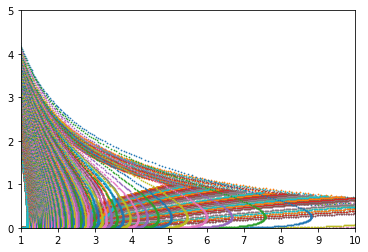

In [110]:
g=gammaSearch()

[1.     1.0025 1.005  1.0075 1.01   1.0125 1.015  1.0175 1.02   1.0225
 1.025  1.0275 1.03   1.0325 1.0375 1.04   1.0425 1.045  1.0475 1.05
 1.0525 1.055  1.0575 1.0625 1.065  1.0675 1.07   1.0725 1.0875 1.09
 1.0925 1.095  1.0975 1.1    1.1025 1.105  1.1075 1.11   1.1125 1.115
 1.1175 1.12   1.1225 1.125  1.1275 1.13   1.1325 1.135  1.1375 1.14
 1.1425 1.145  1.1475 1.15   1.1525 1.155  1.1575 1.16   1.1625 1.165
 1.1675 1.17   1.1725 1.175  1.1775 1.18   1.1825 1.185  1.1875 1.19
 1.1925 1.195  1.1975 1.2    1.2025 1.205  1.2075 1.21   1.2125 1.215
 1.2175 1.22   1.2225 1.225  1.2275 1.23   1.2325 1.235  1.2375 1.24
 1.2425 1.245  1.2475 1.25   1.2525 1.255  1.2575 1.26   1.2625 1.265
 1.2675 1.27   1.2725 1.275  1.2775 1.28   1.2825 1.285  1.2875 1.29
 1.2925 1.295  1.2975 1.3    1.3025 1.305  1.3075 1.31   1.3125 1.315
 1.3175 1.32   1.3225 1.325  1.3275 1.33   1.3325 1.335  1.3375 1.34
 1.3425 1.345  1.3475 1.35   1.3525 1.355  1.3575 1.36   1.3625 1.365
 1.3675 1.37   1.3725 1.37

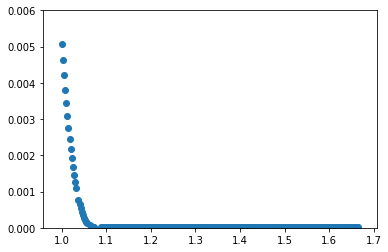

In [111]:
print(g[:,0],g[:,1])
plt.figure(1)
#plt.xscale("log")
plt.ylim((0,.006))
plt.scatter(g[:,0],g[:,1])
#np.log(1.000001)

0

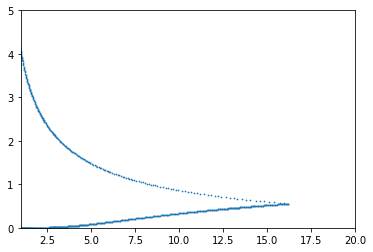

In [116]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import Adiabatic_wind_solver as aws
s2=aws.solver(1.07250000e+00,10)
s2.makePlot(1.30738831e-05,AV=False,xrange=20)

True
True
0.7145761164770619


0

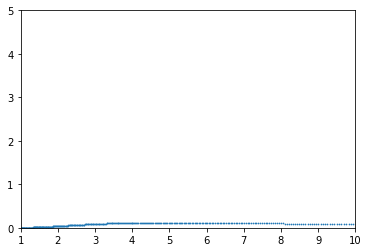

In [18]:
print(type(np.array([s.dx,s.du]))==np.ndarray)
print(np.shape([1,[2,3,4]])==(2,))
gamma=1
print(s.generateFunc(np.array([1,.001,0]))[2][-1])
s.makePlot(.001,AV=False,xrange=10)